In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
bank_data = pd.read_csv("bankdata.csv")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
bank_data.shape

(41188, 21)

In [9]:
bank_data.dropna(inplace=True)

In [10]:
bank_data.shape

(41188, 21)

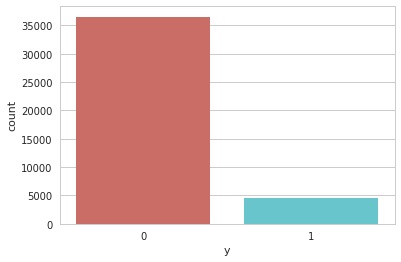

In [11]:
sns.countplot(x='y', data = bank_data, palette='hls')
plt.show()

In [12]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'], dtype='object')

In [15]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [17]:
bank_data.apply(lambda x: sum(x.isna()))

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

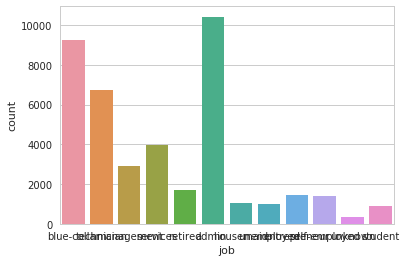

In [21]:
sns.countplot(x='job', data=bank_data)
plt.show()

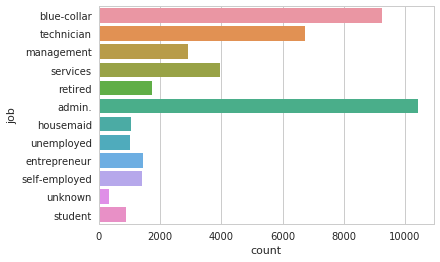

In [22]:
sns.countplot(y='job', data=bank_data)
plt.show()

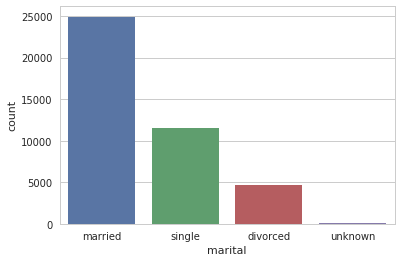

In [20]:
sns.countplot(x='marital', data=bank_data)
plt.show()

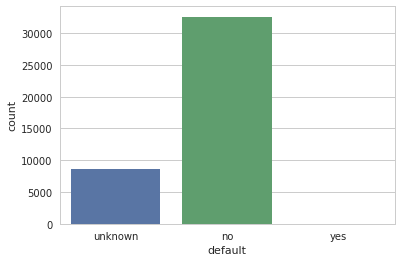

In [23]:
sns.countplot(x='default', data=bank_data)
plt.show()

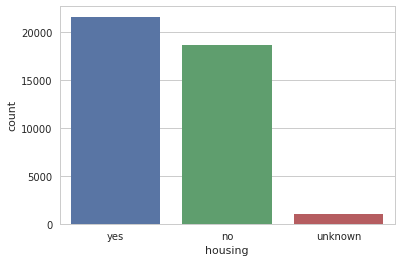

In [24]:
sns.countplot(x='housing', data=bank_data)
plt.show()

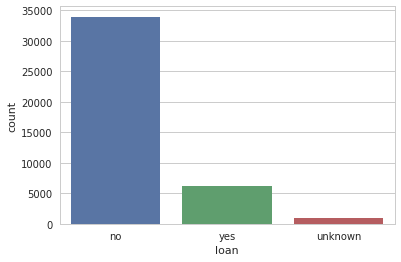

In [26]:
sns.countplot(x='loan', data=bank_data)
plt.show()

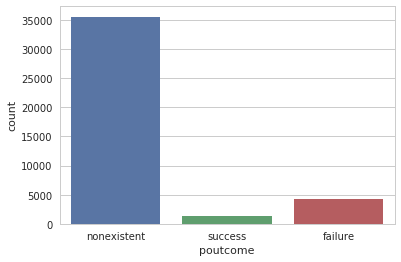

In [27]:
sns.countplot(x='poutcome', data =bank_data)
plt.show()

In [31]:
bank_data.drop(bank_data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [32]:
bank_data.head(2)

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0


In [33]:
data2 = pd.get_dummies(bank_data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [34]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'], dtype='object')

In [36]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)

In [37]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'], dtype='object')

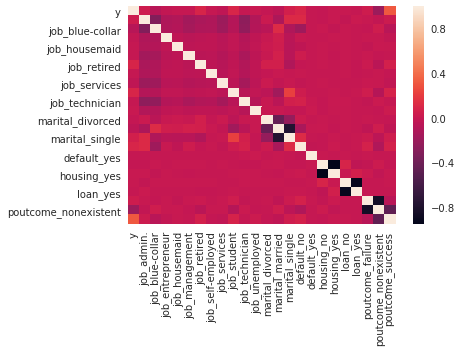

In [39]:
sns.heatmap(data2.corr())
plt.show()

In [40]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
X_train.shape

(30891, 23)

In [48]:
X_test.shape

(10297, 23)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
model = lr.fit(X_train, y_train)

In [52]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
predictions = lr.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm = confusion_matrix(y_test, predictions)

In [56]:
cm

array([[9046,  110],
       [ 912,  229]])

9046+229 are the correct predictions and 110+912 are wrong predictions

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

In [61]:
accuracy = float(accuracy_score(y_test, predictions)*100)

In [62]:
accuracy

90.07477906186267

In [64]:
score = lr.score(X_test, y_test)
score

0.9007477906186268

In [65]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9156
          1       0.68      0.20      0.31      1141

avg / total       0.88      0.90      0.88     10297

